### SIMPLE LINEAR REGRESSION MODEL
---

### Libraries

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


### Reading data

In [5]:
housing = pd.read_csv("../data/housing.csv", index_col=0)
housing.head(2)

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6


### Simple linear regression

$y_i = \beta_0 + \beta_1 * x_i + \epsilon_i $

In [14]:
#lets try to guess what are the real values of intercept and slope
b0 = -5
b1 = 5
housing["guess_response"] = b0 + b1*housing["RM"]


In [15]:
housing["observed_error"] = housing["MEDV"] - housing["guess_response"]

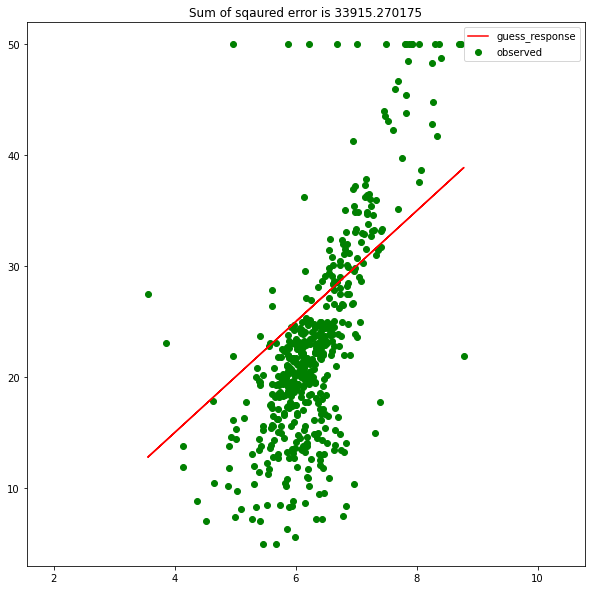

In [16]:
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format(
    (((housing['observed_error'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='observed')
plt.plot(housing['RM'], housing['guess_response'], color='r', label='guess_response')
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.legend()
plt.show()

In [17]:
formula = "MEDV~RM"
model = smf.ols(formula=formula, data=housing).fit()

b0_ols = model.params[0]
b1_ols = model.params[1]

housing["best_fit"] = b0_ols + b1_ols*housing["RM"]
housing["error"] = housing["MEDV"] - housing["best_fit"]

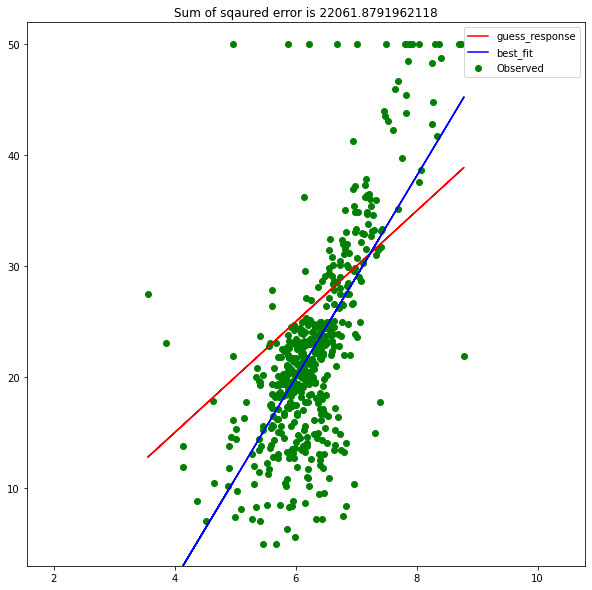

In [22]:
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format(
    (((housing['error'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['guess_response'], color='red', label='guess_response')
plt.plot(housing['RM'], housing['best_fit'], color='b', label='best_fit')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

### Summary table

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           2.49e-74
Time:                        20:06:54   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""